In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datos=pd.read_csv('videojuegos.csv', index_col=0)
#t= datos.values[:,0]
#datos.head()
datos

,name,platform,year,genre,publisher,NA_sales,EU_sales,JP_sales,Other_sales
ranking,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26


In [33]:
datos['global_sales'] = datos['NA_sales']+datos['EU_sales'] + datos['JP_sales'] + datos['Other_sales']


datos_grouped = datos.groupby('platform').sum().drop('year',axis=1)#[['NA_sales','EU_sales','JP_sales','Other_sales', 'global_sales']]

datos_grouped = datos_grouped.sort_values('global_sales')
datos_grouped.head()

,NA_sales,EU_sales,JP_sales,Other_sales,global_sales
platform,,,,,
GBA,6.06,3.90,5.38,0.50,15.84
SNES,12.78,3.75,3.54,0.55,20.62
PS3,7.01,9.27,0.97,4.14,21.39
PS2,24.69,10.98,2.75,13.51,51.93
X360,33.63,14.53,0.43,4.37,52.96


In [38]:
#hacer esto mismo utilizando pivot table... primero ver tipos de dato

,NA_sales,EU_sales,JP_sales,Other_sales,global_sales
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,41.577778,22.903333,12.016667,7.138889,83.636667
std,36.329248,27.540695,12.646996,7.945896,77.313856
min,6.060000,3.750000,0.430000,0.500000,15.840000
25%,12.780000,7.650000,2.750000,1.700000,21.390000
50%,33.630000,10.980000,5.380000,4.140000,52.960000
75%,54.300000,20.040000,24.600000,12.990000,102.870000
max,119.740000,85.790000,33.730000,23.780000,253.910000


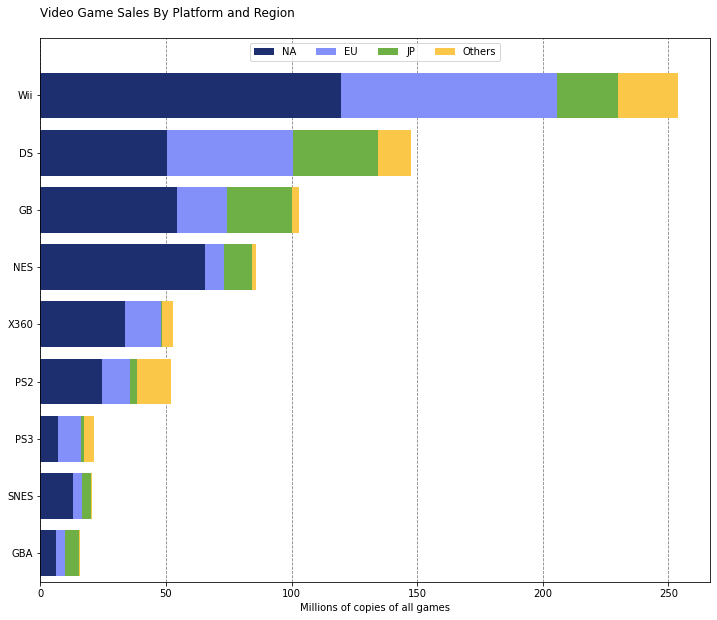

In [34]:
fields = ['NA_sales','EU_sales','JP_sales','Other_sales']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['NA', 'EU', 'JP', 'Others']

fig, ax = plt.subplots(1, figsize=(12, 10))

left = len(datos_grouped) * [0] #se asigna el valor 0 a una serie "left" del mismo largo que la serie "datos"
for idx, name in enumerate(fields): #esto es como usar for i in range(len(fields))
    plt.barh(datos_grouped.index, datos_grouped[name], left = left, color=colors[idx])
    left += datos_grouped[name]
    
plt.title('Video Game Sales By Platform and Region\n', loc='left')
plt.legend(labels, ncol=4, frameon=True, loc='upper center')
plt.xlabel('Millions of copies of all games')

plt.ylim(-0.5, ax.get_yticks()[-1] + 1)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()


Hacemos algo similar pero por medio de la creacion de una funcion que permita repetir el proceso si escribir todo de nuevo

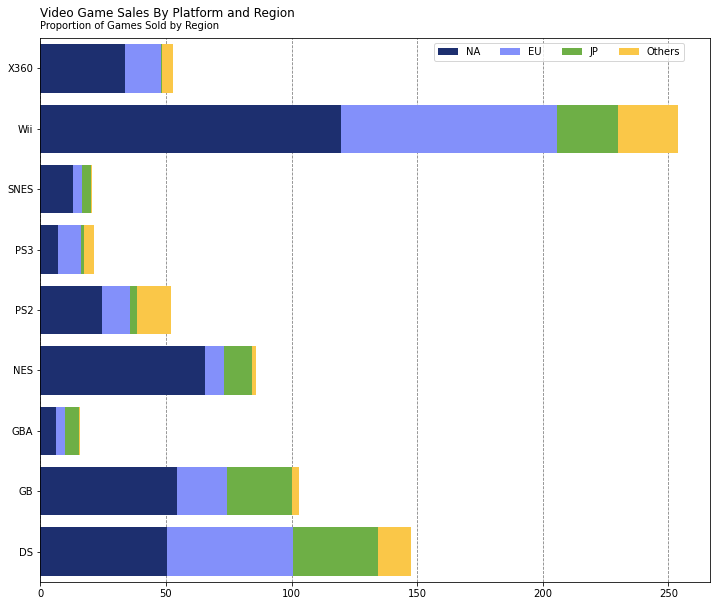

In [18]:
labels = ['NA', 'EU', 'JP', 'Others']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
title = 'Video Game Sales By Platform and Region\n'
subtitle = 'Proportion of Games Sold by Region'

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    fig, ax = plt.subplots(1, figsize=(12, 10))
    
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
        
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.65, subtitle)
    
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=True)
    
    xticks = np.arange(0,300, 50)
    xlabels = ['{}'.format(i) for i in np.arange(0,300,50)]
    plt.xticks(xticks, xlabels)
    
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.set_axisbelow(True)
    
    plt.show()
    
datos_grouped2 = datos.groupby('platform').sum()[['NA_sales','EU_sales','JP_sales','Other_sales']]    
plot_stackedbar_p(datos_grouped2, labels, colors, title, subtitle)

se calculan los porcentajes de ventas de cada region respecto a las ventas globales

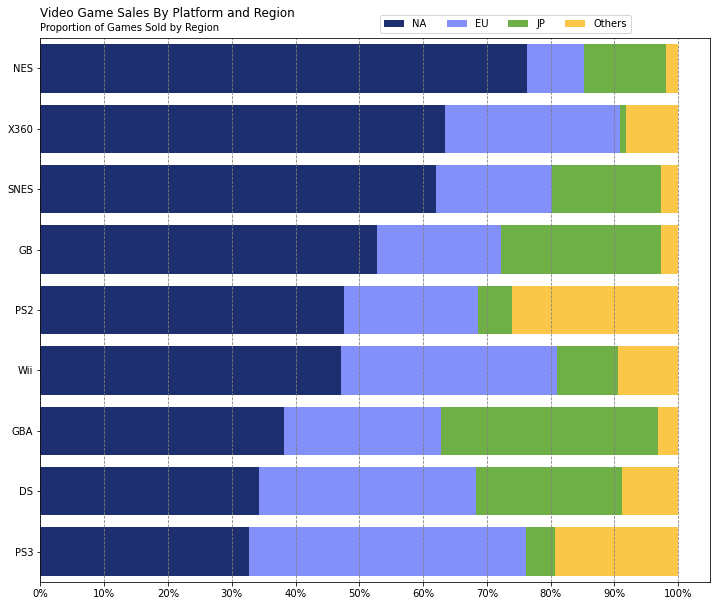

In [21]:
fields = datos_grouped.columns.tolist()
datos_grouped

for i in fields:
    datos_grouped['{}_percent'.format(i)] = datos_grouped[i] / datos_grouped['global_sales']

datos_grouped.sort_values('NA_sales_percent', inplace=True)
datos_perc=datos_grouped.loc[:,'NA_sales_percent':'Other_sales_percent']
datos_perc

def plot_stackedbar_perc(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    fig, ax = plt.subplots(1, figsize=(12, 10))
    
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
        
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.62, subtitle)
    
    plt.legend(labels, bbox_to_anchor=([0.5, 1, 0, 0]), ncol=4, frameon=True)
    
    xticks = np.arange(0,1.1, 0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
    
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    
    plt.show()
    
plot_stackedbar_perc(datos_perc, labels, colors, title, subtitle)
